TikZ and PGF are TeX packages for creating graphics programmatically. TikZ is built on top of PGF and allows you to create sophisticated graphics in a rather intuitive and easy manner.

In [11]:
%reload_ext tikzmagic
%reload_ext tikzmagicbe

The command <code>tikz</code> command derives from the original <code>tikzmagic</code> script.
The command <code>tikzbe</code> command derives from the <code>tikzmagic</code> script, which is essentially the same but requires including the code between <code>\\begin{tikzpicture}</code> and <code>\\end{tikzpicture}</code>.


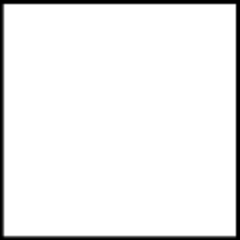

In [3]:
%tikz \draw (0,0) rectangle (1,1);

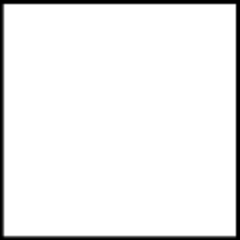

In [15]:
%%tikzbe
\begin{tikzpicture}[scale=1]
    \draw (0,0) rectangle (1,1);
\end{tikzpicture}

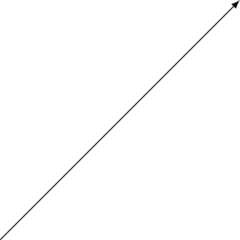

In [65]:
%%tikz [>=latex'] 
\draw [->] (0,0) -- (4,4); 

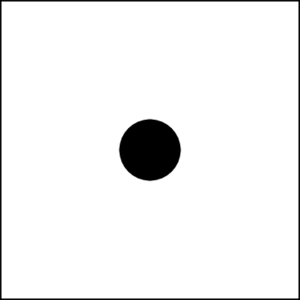

In [107]:
%%tikz --scale 2 --size 300,300 -f png
\draw (0,0) rectangle (1,1);
\filldraw (0.5,0.5) circle (.1);

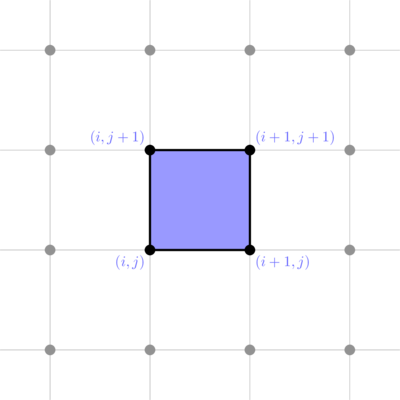

In [67]:
%%tikz -s 400,400 -sc 1.2 -f png
[>=latex']
\draw [style=help lines, step=2]				(-1,-1)	grid		(+7,+7);
\draw [line width=0.5mm, fill=blue!40!white]	(+2,+2)	rectangle	(+4,+4);
 
\draw [blue!60!white] (  2,  2) node[anchor=north east] {$(i  ,j  )$};
\draw [blue!60!white] (  4,  2) node[anchor=north west] {$(i+1,j  )$};
\draw [blue!60!white] (  4,  4) node[anchor=south west] {$(i+1,j+1)$};
\draw [blue!60!white] (  2,  4) node[anchor=south east] {$(i  ,j+1)$};

\filldraw [color=gray]	(0,0) circle (.1);
\filldraw [color=gray]	(0,2) circle (.1);
\filldraw [color=gray]	(0,4) circle (.1);
\filldraw [color=gray]	(0,6) circle (.1);
\filldraw [color=gray]	(2,0) circle (.1);
\filldraw [color=black]	(2,2) circle (.1);
\filldraw [color=black]	(2,4) circle (.1);
\filldraw [color=gray]	(2,6) circle (.1);
\filldraw [color=gray]	(4,0) circle (.1);
\filldraw [color=black]	(4,2) circle (.1);
\filldraw [color=black]	(4,4) circle (.1);
\filldraw [color=gray]	(4,6) circle (.1);
\filldraw [color=gray]	(6,0) circle (.1);
\filldraw [color=gray]	(6,2) circle (.1);
\filldraw [color=gray]	(6,4) circle (.1);
\filldraw [color=gray]	(6,6) circle (.1);

Alternatively, a for loop can be used to clean up the code

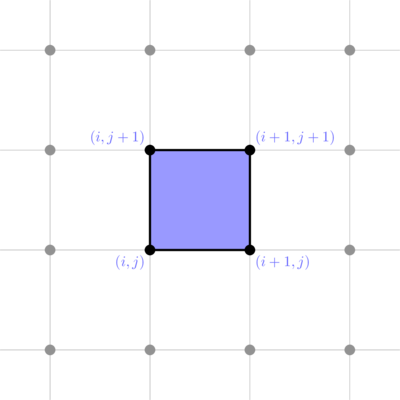

In [14]:
%%tikz -s 400,400 -sc 1.2 -f png
[>=latex']
\draw [style=help lines, step=2]				(-1,-1)	grid		(+7,+7);
\draw [line width=0.5mm, fill=blue!40!white]	(+2,+2)	rectangle	(+4,+4);
 
\draw [blue!60!white] (  2,  2) node[anchor=north east] {$(i  ,j  )$};
\draw [blue!60!white] (  4,  2) node[anchor=north west] {$(i+1,j  )$};
\draw [blue!60!white] (  4,  4) node[anchor=south west] {$(i+1,j+1)$};
\draw [blue!60!white] (  2,  4) node[anchor=south east] {$(i  ,j+1)$};

\foreach \x in {0,2,...,6}{
	\foreach \y in {0,2,...,6}{
		\ifthenelse{\(\x=2 \AND \y=2\) \OR \(\x=2 \AND \y=4\) \OR \(\x=4 \AND \y=2\) \OR \(\x=4 \AND \y=4\)}{
				\filldraw [color=black] (\x,\y) circle (.1);
			}{
				\filldraw [color=gray] (\x,\y) circle (.1);
			};
	}
}

# Examples of DSP block diagrams in TikZ

Block diagrams can be created in TikZ using the standard commands ```\node```, ```\draw``` and ```\path```.
Alternatively, using the tikzlibrary ```dsp``` can simplify the process:


### Adaptive filter in a two-microphones scenario

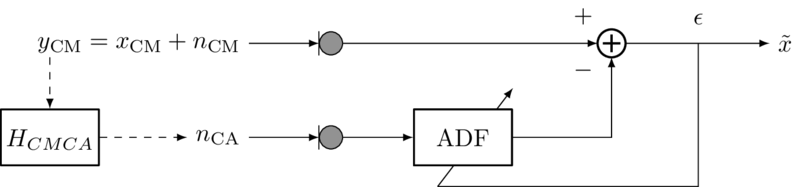

In [70]:
%%tikz -s 800,400
\node[](des_sig) {$y_\text{CM} = x_\text{CM}+n_\text{CM}$};
\node[circle,draw,right = of des_sig,fill=gray] (Y1) {};
\node[circle,draw,below = of Y1,fill=gray] (Y2) {};
\draw [-] let \p0 = (Y1.north), \p1 = (Y1.south), \p2 = (Y1.west) in (\x2,\y0) -- (\x2,\y1);
\draw [-] let \p0 = (Y2.north), \p1 = (Y2.south), \p2 = (Y2.west) in (\x2,\y0) -- (\x2,\y1);
\path let \p1 = (des_sig.west), \p2 = (Y2.west) in node[dspfilter] (HCMCA)  at (\x1+3mm,\y2) {$H_{CMCA}$};
\draw [->,dashed] let \p0 = (des_sig.west), \p1 = (HCMCA.north) in (\x0+3mm,\y0-2mm) -- (\x1,\y1);
\node[right = of HCMCA,xshift=.7em] (n) {$n_{\text{CA}}$};
\draw [->,dashed] (HCMCA.east) -- (n.west);
\draw [->] (n.east) -- (Y2.west);
\node[dspfilter,right = of Y2] (ADF) {ADF};
\node[dspadder,right = of Y1,label={above left:$+$},label={below left:$-$},xshift=7.5em] (sum2) {};
\draw [->] (Y1.east) -- (sum2.west);
\draw [->] (Y2.east) -- (ADF.west);
\node[right = of sum2,xshift=3em](filt_sig) {$\tilde{x}$};
\draw [->] (ADF.east) -| (sum2.south);
\draw [->] (sum2.east) -- (filt_sig.west);
\draw [->] (des_sig.east) -- (Y1.west);
\node[right=of sum2] (afupd1) {};
\draw[-] let \p0 = (filt_sig), \p1=($(sum2)!0.5!(filt_sig)$), \p2=(ADF.west) in (\x1,\y0) |- (\x2+1em,\y2-2em);
\path let \p0 = (filt_sig), \p1=($(sum2)!0.5!(filt_sig)$)in node[] (error)  at (\x1,\y0+1em) {$\epsilon$};
\draw[->] let \p1=(ADF.west), \p2=(ADF.east) in (\x1+1em,\y1-2em) -- (\x2,\y2+2em);
\node[dspfilter,right = of Y2,fill=white] (ADF) {ADF};

### Scheme for adaptive feedback cancellation

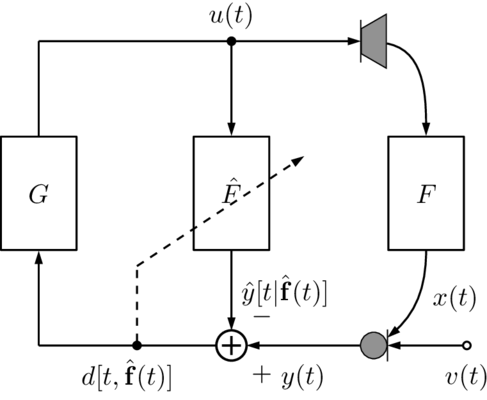

In [13]:
%%tikz -s 600,400
%------- Source signal ---------
\node[dspnodeopen,dsp/label=below] 
  (ns) {$v(t)$}; 
  
%------- Mic symbol ---------  
\node[left=of ns,fill=gray,circle,minimum size=0.35cm,draw] 
  (mic) {};
\draw ([yshift=6pt]mic.east) -- ([yshift=-6pt]mic.east);

%------- Adder --------- 
\node[dspadder,left=of mic,left=1.5cm,label={above right:$-$},label={below right:$+$}] 
  (add) {};
  
%------- Forward path ----------------   
\node[coordinate,left=of add,left=2.35cm]
  (fp1) {};
\node[dspfilter,above=of fp1,above=1.25cm,minimum height=1.5cm,minimum width=1cm]
  (gain) {$G$};
\node[coordinate,above=of gain,above=1.25cm]
  (fp2) {};

%------- Adaptive filter 1 ---------
\node[dspnodefull,right=of fp2,right=2.5cm]
  (adnode) {$u(t)$};
\node[dspfilter,right=of gain,right=1.525cm,minimum height=1.5cm,minimum width=1cm] 
  (adfilt) {$\hat{F}$};

%------- LS symbol ---------
\node[draw,right= 4.26cm of fp2,fill=gray,trapezium,shape border rotate=90,shape border uses incircle]
  (ls) {};
\draw ([yshift=-8pt]ls.west) -- ([yshift=8pt]ls.west);

%------- Real RIR block ---------
\node[dspfilter,right=of gain,right=4.1cm,minimum height=1.5cm,minimum width=1cm]
  (feedback) {$F$};
  
%------- Adaptive filter arrow ---------   
\node[dspnodefull,left=of add]
  (adfilt_upd_1) {};
\node[coordinate,above=of adfilt_upd_1,above=1cm]
  (adfilt_upd_2) {};
\coordinate (aux) at ([yshift=-4pt]adfilt.center);

%--------- Dummy nodes to avoid labels clipping
\node at (0.15,0) {};
\node at (-3,4.45) {};
\node at (-4,-0.55) {};

%----------------------------------------------------------------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%
% Connections
%%%%%%%%%%%%%%%%%%%%%%%
\draw[dspconn] (ns) -- (mic);
\draw[dspconn] (mic) -- node[midway,below=0.12cm] {$y(t)$} (add);
%--------- Forward path (from adder to ls)
\draw[dspline] (add) -- node[midway,below=0.05] {$d[t,\hat{\mathbf{f}}(t)]$} (fp1);
\draw[dspconn] (fp1) -- (gain);
\draw[dspline] (gain) -- (fp2);
\draw[dspline] (fp2) -- (adnode);
\draw[dspconn] (ls) to[out=-10,in=90] (feedback);
%--------- Adaptive filter update
\draw[dspline,dashed] (adfilt_upd_1) -- (adfilt_upd_2);
\draw[dspconn,dashed] (adfilt_upd_2) -- ( $ (adfilt_upd_2)!75pt!(aux) $ );
%--------- Adaptive filter
\draw[dspconn] (adnode) -- (ls);
\draw[dspconn] (adnode) -- (adfilt);
\draw[dspconn] (adfilt) -- node[midway,yshift=0,right] {$\hat{y}[t |\hat{\mathbf{f}}(t)]$} (add);
%------- Real RIR
\draw[dspconn] (feedback) to[out=-90,in=40] node[midway,above=-0.30cm,xshift=0.5cm] {$x(t)$} ([yshift=3pt]mic.east);

### Scheme for adaptive feedback cancellation with prefiltering

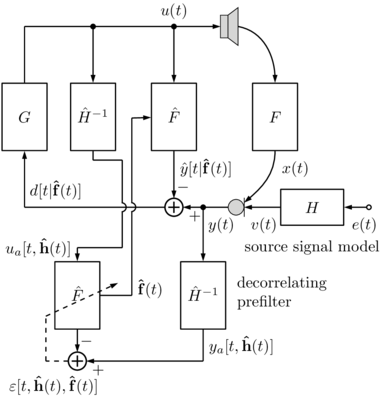

In [7]:
%%tikz -s 800,400
%%%%%%%%%%%%%%%%%%%%%%%
% Blocks and nodes
%%%%%%%%%%%%%%%%%%%%%%%

%------- Source signal ---------
\node[dspnodeopen,dsp/label=below] 
  (noise_source) {}; 
\node[dspfilter,left=of noise_source,left=0.5cm]
  (source_model) {$H$};
\node[below=of source_model,below=0.2cm] 
  (source_signal) {source signal model}; 
  
%------- Mic symbol ---------
\node[left=of source_model,fill=gray!40,circle,minimum size=0.35cm,draw,left=0.8cm] 
  (mic) {};
\draw ([yshift=6pt]mic.east) -- ([yshift=-6pt]mic.east);  

%------- Adder --------- 
\node[dspadder,left=of mic,left=1.0cm,label={above ,right=0.2cm:$-$},label={right,above=-0.2cm:$+$}] 
  (add) {};
  
%------- Forward path ----------------  
\node[coordinate,left=of add,left=3.125cm]
  (fp1) {};
\node[dspfilter,above=of fp1,above=1.25cm,minimum height=1.5cm,minimum width=1cm]
  (gain) {$G$};
\node[coordinate,above=of gain,above=1.25cm]
  (fp2) {};
  
%------- Decorr. of u ----------------
\node[dspnodefull,right=of fp2,right=1.475cm]
  (dec_node_u) {};
\node[dspfilter,right=of gain,right=.5cm,minimum height=1.5cm,minimum width=1cm]
  (dec_filt_u) {$\hat{H}^{-1}$}; 
\node[coordinate,below=of dec_filt_u,below=0.2cm]
  (dec_coord_u_1) {};  
\node[coordinate,right=of dec_coord_u_1,right=0.65cm]
  (dec_coord_u_2) {};    
\node[coordinate,below=of dec_coord_u_2,below=0.95cm]
  (dec_coord_u_2a) {};  
\node[coordinate,below=of dec_coord_u_2a,below=0.2cm]
  (dec_coord_u_2b) {};    
\node[coordinate,below=of dec_coord_u_2,below=1.95cm]
  (dec_coord_u_3) {};  
\node[coordinate,left=of dec_coord_u_3,left=1cm]
  (dec_coord_u_4) {};    
  

%------- Adaptive filter 2 (decorr path) --------- 
\node[dspfilter,below=of dec_coord_u_4,below=0.3cm,minimum height=1.5cm,minimum width=1cm] 
  (adfilt2) {$\hat{F}$};

%------- Adder decorr path--------- 
\node[dspadder,below=of adfilt2,below=0.5cm,label={above ,right=0.2cm:$-$},label={right,above=-0.2cm:$+$}] 
  (add_dec) {};  
  
%------- Decorr. of y ----------------
\node[dspnodefull,left=of mic,left=0.5cm]
  (dec_node_y) {};
\node[dspfilter,below=of dec_node_y,below=1.15cm,minimum height=1.5cm,minimum width=1cm,label={[align=left,xshift=1.75cm,yshift=-1.2cm,]decorrelating\\prefilter}]
  (dec_filt_y) {$\hat{H}^{-1}$}; 
\node[coordinate,below=of dec_filt_y,below=0.7cm]
  (dec_coord_y_1) {};    

%------- Adaptive filter 1 --------- 
\node[dspnodefull,right=of fp2,right=3.275cm]
  (adnode) {$u(t)$};
\node[dspfilter,right=of gain,right=2.3cm,minimum height=1.5cm,minimum width=1cm] 
  (adfilt1) {$\hat{F}$};
  
%------- Connection between adfilt2 and adfilt1 --------- 
\node[coordinate,right=of adfilt2,right=0.7cm]
(adfilt_conn_1) {};
\node[coordinate,above=of adfilt_conn_1,above=1.865cm]
  (adfilt_conn_1a) {};  
\node[coordinate,below=of adfilt_conn_1a,above=0.2cm]
  (adfilt_conn_1b) {};    
\node[coordinate,above=of adfilt_conn_1,above=3.95cm]
(adfilt_conn_2) {};

%------- Adaptive filter 2 arrow --------- 
\node[coordinate,left=of add_dec,left=0.5cm]
(adfilt2_upd_1) {};
\node[coordinate,above=of adfilt2_upd_1,above=1.0cm]
(adfilt2_upd_2) {};
\coordinate (adfilt2_upd_3) at ([yshift=-4pt]adfilt2.center);

%------- LS symbol ---------
\coordinate (lscoord) at ($(fp2)+(4.7525,0)$);
%\node[draw,right= 4.525cm of fp2,fill=gray,trapezium,shape border rotate=90,shape border uses incircle]
%  (ls) {};
%\draw[fill=gray] ([yshift=-5pt]ls.west) -- ([yshift=5pt]ls.west) -- ([yshift=5pt,xshift=-2pt]ls.west) -- ([yshift=-5pt,xshift=-2pt]ls.west) -- cycle;
\pic[rotate=90,scale=0.8] (ls) at (lscoord) {coordSpeaker};



%------- Real RIR block ---------
\node[dspfilter,right=of gain,right=4.55cm,minimum height=1.5cm,minimum width=1cm]
  (feedback) {$F$};
  
%--------- Dummy nodes to avoid labels clipping
\node at (-3,4.5) {};  

%----------------------------------------------------------------------------------------------------------
%%%%%%%%%%%%%%%%%%%%%%%
% Connections
%%%%%%%%%%%%%%%%%%%%%%%
\draw[dspconn] (noise_source) -- node[midway,below=0.1cm,xshift=0.2cm] {$e(t)$} (source_model);
\draw[dspconn] (source_model) -- node[midway,below=0.1cm,xshift=0.035cm] {$v(t)$} (mic);
\draw[dspconn] (mic) -- node[midway,below=0.1cm,xshift=0.35cm] {$y(t)$} (add);
%--------- Forward path (from adder to ls)
\draw[dspline] (add) -- (fp1);
\draw[dspconn] (fp1) -- node[at start,above=0.05cm,xshift=0.7cm] {$d[t |\mathbf{\hat{f}}(t)]$} (gain);
\draw[dspline] (gain) -- (fp2);
\draw[dspline] (fp2) -- (adnode);
\draw[dspconn] (adnode) -- (ls-back);
%--------- Adaptive filter 1
\draw[dspconn] (adnode) -- (adfilt1);
\draw[dspconn] (adfilt1) -- node[midway,right,yshift=0.15cm] {$\hat{y}[t |\mathbf{\hat{f}}(t)]$} (add);
\draw[dspconn] (ls-front) to[out=-10,in=90] (feedback);
%--------- Decorrelation of u to adder dec
\draw[dspconn] (dec_node_u) -- (dec_filt_u);
\draw[dspline] (dec_filt_u) -- (dec_coord_u_1);
\draw[dspline] (dec_coord_u_1) -- (dec_coord_u_2);
\draw[dspline] (dec_coord_u_2) -- (dec_coord_u_2a);
\draw[dspline] ([xshift=-0.36pt]dec_coord_u_2b) arc (-90:90:0.1cm); % Using arc
\draw[dspline] (dec_coord_u_2b) -- (dec_coord_u_3);
\draw[dspline] (dec_coord_u_3) -- (dec_coord_u_4);
\draw[dspconn] (dec_coord_u_4) -- node[midway,left,yshift=0.15cm] {$u_a[t,\mathbf{\hat{h}}(t)]$} (adfilt2);
\draw[dspconn] (adfilt2) -- (add_dec);
%--------- Decorrelation of y to adder dec
\draw[dspconn] (dec_node_y) -- (dec_filt_y);
\draw[dspline] (dec_filt_y) -- node[midway,right,yshift=0.0cm] {$y_a[t,\mathbf{\hat{h}}(t)]$} (dec_coord_y_1);
\draw[dspconn] (dec_coord_y_1) -- (add_dec);
%--------- Connection between adfilt2 and adfilt1
\draw[dspline] (adfilt2) -- (adfilt_conn_1);
\draw[dspline] (adfilt_conn_1) -- node[at start,right,yshift=0.15cm] {$\mathbf{\hat{f}}(t)$} (adfilt_conn_1a);
\draw[dspline] ([xshift=-0.36pt]adfilt_conn_1a) arc (-90:90:0.1cm); % Using arc
%\draw[dspline] (adfilt_conn_1a) to[out=0,in=0] (adfilt_conn_1b); % Using only a line
\draw[dspline] (adfilt_conn_1b) -- (adfilt_conn_2);
\draw[dspconn] (adfilt_conn_2) -- (adfilt1);
%--------- Adaptive filter 2 update
\draw[dspline,dashed] (add_dec) -- node[midway,below=0.2,xshift=-0.075cm] {$\varepsilon [t,\mathbf{\hat{h}}(t),\mathbf{\hat{f}}(t)]$} (adfilt2_upd_1);
\draw[dspline,dashed] (adfilt2_upd_1) -- (adfilt2_upd_2);
\draw[dspconn,dashed] (adfilt2_upd_2) -- ( $ (adfilt2_upd_2)!50pt!(adfilt2_upd_3) $ );
%------- Real RIR
\draw[dspconn] (feedback) to[out=-90,in=40] node[midway,above=-0.06cm,xshift=0.65cm] {$x(t)$} ([yshift=3pt]mic.east);

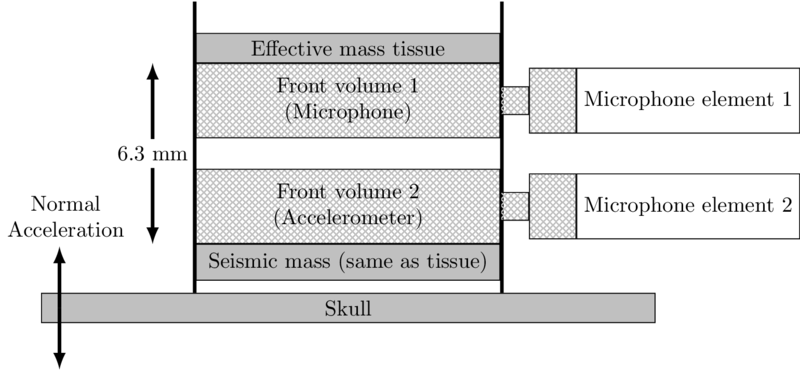

In [92]:
%%tikz -s 800,400

% skull rectangle
\node[draw,minimum width=10cm,minimum height=3ex,fill=lightgrey] (skull) {Skull};

% draw supporting lines
\draw[-,,black,ultra thick] let \p1=($(skull.north)!0.5!(skull.north east)$) in (\x1,\y1) -- (\x1,5);
\draw[-,,black,ultra thick] let \p1=($(skull.north)!0.5!(skull.north west)$) in (\x1,\y1) -- (\x1,5);

% draw acceleration lines
\draw[->,,black,ultra thick] let \p1=(skull.north west),\p2 =($(skull.north)!0.5!(skull.south)$)  in (\x1+.3cm,\y2) -- (\x1+.3cm,1);
\draw[->,,black,ultra thick] let \p1=(skull.north west),\p2 =($(skull.north)!0.5!(skull.south)$)  in (\x1+.3cm,\y2) -- (\x1+.3cm,-1);
\path let \p1 = (skull.north west) in node[align = center] at (\x1+.4cm,1.5) {Normal \\ Acceleration};

% seismic mass 
\path let \p1=($(skull.north)!0.5!(skull.north west)$) in node[draw,minimum width=4.95cm,minimum height=3ex,fill=lightgrey,anchor=south west] (SM)  at (\x1+.5,\y1+.2cm) {Seismic mass (same as tissue)};
% front volume 2
\path let \p1=(SM.north west) in node[draw,minimum width=4.95cm,minimum height=8ex,anchor=south west,pattern=crosshatch,pattern color=lightgrey,align = center] (FV2)  at (\x1,\y1) {Front volume 2 \\ (Accelerometer)};
% front volume 1
\path let \p1=(FV2.north west) in node[draw,minimum width=4.95cm,minimum height=8ex,anchor=south west,pattern=crosshatch,pattern color=lightgrey,align = center] (FV1)  at (\x1,\y1+.5cm) {Front volume 1 \\ (Microphone)};
% effective mass
\path let \p1=(FV1.north west) in node[draw,minimum width=4.95cm,minimum height=3ex,anchor=south west,fill=lightgrey] (EM)  at (\x1,\y1) {Effective mass tissue};

% distance between elements
\path let \p1=($(FV1.south west)!0.5!(FV2.north west)$) in node (dist) at (\x1-2em,\y1) {6.3 mm};
\draw[->,black,ultra thick] let \p1=(dist.north), \p2=(FV1.north west) in (\x1,\y1) -- (\x1,\y2);
\draw[->,black,ultra thick] let \p1=(dist.south), \p2=(FV2.south west) in (\x1,\y1) -- (\x1,\y2);

% microphone label
%\path let \p1=(FV1.west)  in node[anchor=east] (ML) at (\x1,\y1) {Microphone};
% accelerometer label
%\path let \p1=(FV2.west)  in node[anchor=east] (AL) at (\x1,\y1) {Accelerometer};


% microphone element 1
\path let \p1=(FV1.east) in node[draw,minimum width=3ex,minimum height=3ex,anchor=west,pattern=crosshatch,pattern color=lightgrey] (mic_conn)  at (\x1,\y1) {};
\path let \p1=(mic_conn.east) in node[draw,minimum width=5ex,minimum height=7ex,anchor=west,pattern=crosshatch,pattern color=lightgrey] (mic_conn1)  at (\x1,\y1) {};
\path let \p1=(mic_conn1.east) in node[draw,minimum width=15ex,minimum height=7ex,anchor=west] (mic_el1)  at (\x1,\y1) {Microphone element 1};

% microphone element 2
\path let \p1=(FV2.east) in node[draw,minimum width=3ex,minimum height=3ex,anchor=west,pattern=crosshatch,pattern color=lightgrey] (mic_conn2)  at (\x1,\y1) {};
\path let \p1=(mic_conn2.east) in node[draw,minimum width=5ex,minimum height=7ex,anchor=west,pattern=crosshatch,pattern color=lightgrey] (mic_conn3)  at (\x1,\y1) {};
\path let \p1=(mic_conn3.east) in node[draw,minimum width=15ex,minimum height=7ex,anchor=west] (mic_el2)  at (\x1,\y1) {Microphone element 2};


%\draw[-,black,ultra thick] ($(skull.north)!0.5!(skull.north east)$) -- (0,5);

%\draw ($(skull.north)!0.5!(skull.north east)$ -- 5,10) node {B};


# Other examples

___________________________________

The following example draws a common schematic situation used to describe listening test

Some macros (included in a <code>\tikzset{}</code> environment) are used in the tikzfigure to generate the following complex elements:

- a speaker
```tex
\tikzset{
      Speaker/.pic={
          \filldraw[fill=gray!40,pic actions] (-15pt,0) -- (15pt,0) 
          -- ++([shift={(-6pt,8pt)}]0pt,0pt) coordinate (aux1) -- ++(-18pt,0) coordinate (aux2) 
          -- cycle (aux1) -- ++(0,6pt) -- ++(-18pt,0) -- (aux2);
      }
}
```

- a human head, with default skin/hair colors
```tex
\tikzset{
    pics/Human/.style n args={2}{
        code={
            \filldraw[fill=#1]
              (0,0.7cm) ellipse [x radius=5pt,y radius=3pt]
              (0,-0.7cm) ellipse [x radius=5pt,y radius=3pt];
            \filldraw[fill=#1]
              (0.7,4pt) -- (0.7,-4pt) -- (0.95,0pt) -- cycle;
            \filldraw[fill=#1]
              (0,0) ellipse [x radius=0.8cm, y radius=0.7cm];
            \filldraw[fill=#2]
              (0.5,0.55) arc[start angle=50,end angle=310,x radius=0.8cm, y radius=0.7cm]
              to[out=60,in=230] cycle;
        },
    },
    pics/Human/.default={skin}{black},
}
```

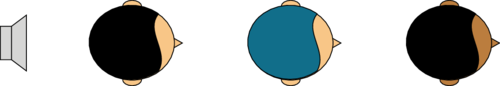

In [11]:
%%tikz -s 500,500

\pic[rotate=90] at (0,0) {Speaker};
\pic[rotate=0] at (2,0) {Human};
\pic[rotate=0] at (5,0) {Human={skin}{blue_kuleuven}};
\pic[rotate=0] at (8,0) {Human={brown!98!black}{black}};

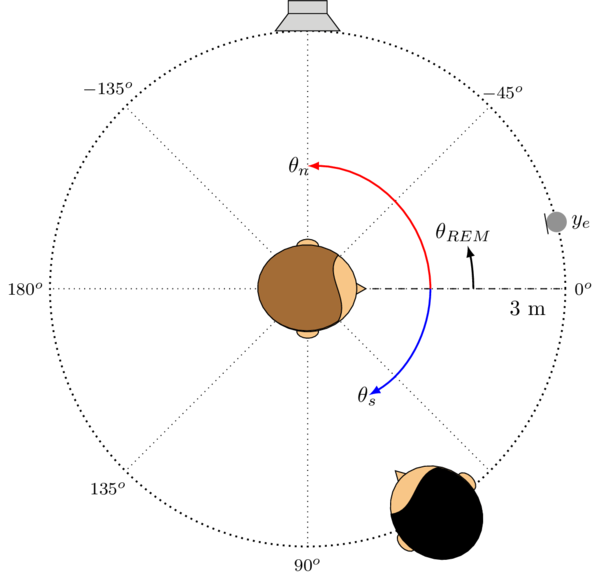

In [12]:
%%tikz -s 600,600

\pgfplotsinvokeforeach{0,45,90,135,180,225,270,315}{
    \draw [dotted] (180:0cm) -- (#1:4.2cm);
}

\draw[dotted,thick]  (0:4.2cm) arc (0:360:4.2cm);
\pic[rotate=0,local bounding box=speaker] at (90:4.2cm) {Speaker};
\draw[dashed] (180:0cm) -- (0:4.2cm);
\node[]  at (-5:3.6cm) () {3 m};
\pic[rotate=0,local bounding box=A1] {Human={skin}{brown!85!black}};
\pic[rotate=135,local bounding box=A1] at (-60:4.2cm) {Human};

\draw[blue,->,thick]  (0:2cm) arc (0:-60:2cm);
\node[]  at (-61:2cm) () {$\theta_s$};

\draw[red,->,thick]  (0:2cm) arc (0:90:2cm);
\node[]  at (94:2cm) () {$\theta_n$};

 \node[] at (0:4.5cm) {\footnotesize $0^{o}$};
 \node[] at (270:4.5cm) {\footnotesize $90^{o}$};
   \node[] at (45:4.5cm) {\footnotesize $-45^{o}$};
      \node[] at (180:4.6cm) {\footnotesize $180^{o}$};
           \node[] at (-135:4.6cm) {\footnotesize $135^{o}$};
                  \node[] at (135:4.6cm) {\footnotesize $-135^{o}$};
\node[circle,fill=gray]  at (15:4.2cm) (Y1) {};
\draw[black,->,thick]  (0:2.7cm) arc (0:15:2.7cm);
\node[]  at (20:2.7cm) () {$\theta_{REM}$};

\draw [-,rotate=190] let \p0 = (Y1.north), \p1 = (Y1.south), \p2 = (Y1.west) in (\x2,\y0) -- (\x2,\y1);

\node[right = of Y1,xshift=-3em] (ref) {$y_e$};

Example of a parameterized progress bar in Tikz, using the code
```tex
\newcommand{\progressbar}[3]{
    \begin{tikzpicture}[rounded corners=2pt,very thin,scale=1]

        \shade[top color=pbgray!20,bottom color=pbgray!20,middle color=pbgray!50]
          (0pt, 0pt) rectangle ++ (#1, #2);

        \shade[draw=blue_kuleuven,top color=blue_kuleuven!60,bottom color=blue_kuleuven!60,middle color=blue_kuleuven]
            (0pt, 0pt) rectangle ++ (#1/100*#3pt, #2);

        \ifthenelse{#3 < 50}{
           \def\pbcol{blue_kuleuven}
        }{
           \def\pbcol{white}
        }

        \draw[color=blue_kuleuven!50]
          (0pt, 0pt) rectangle (#1, #2)
            node[pos=0.5,white] {\scriptsize{
                \textbf{\color{\pbcol}{#3\,\%}}
            }
        };
    \end{tikzpicture}
}
```

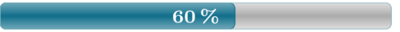

In [252]:
%%tikzbe
\progressbar{150pt}{10pt}{60}

# Plots

## Use of the environment Axis

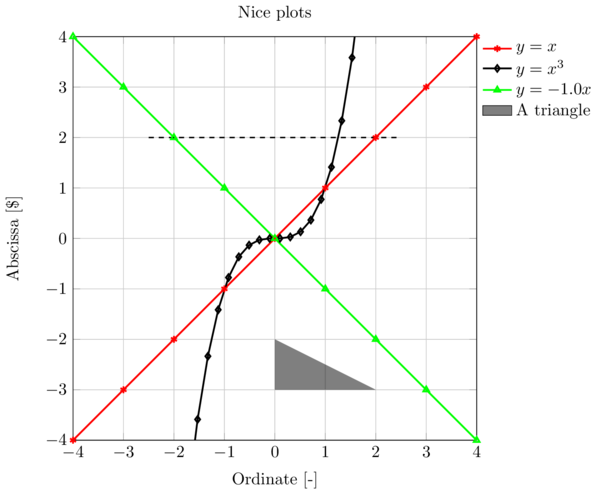

In [10]:
%%tikz -s 600,600
\begin{axis}[
%
	width=10cm,
	height=10cm,
	%scale only axis,
 	xmin=-4, xmax=4,
 	ymin=-4, ymax=4,
	xlabel={Ordinate [-]},  
    ylabel={Abscissa [\$]},
	xminorticks=true, yminorticks=true,    
    yticklabel style={text width=2em,align=right},
	xticklabel style={text width=2em,align=center},    	
	ylabel style={align=center},
	xmajorgrids,  xminorgrids,
	ymajorgrids,  yminorgrids,
	mark size=2pt, samples=11,
	title={Nice plots},
	legend style={at={(1,1)},legend columns=1,anchor=north west,fill=none,draw=none,legend cell align=left}
]
% Definition of k
\pgfmathsetmacro{\k}{-1}

% Linear with x (default name variable)
\addplot [color=red,mark=asterisk,solid,line width=1.0pt]
(x, {x});
\addlegendentry{$y = x$};

% Linear with t (non-default name variable)
\addplot [color=black,mark=diamond,solid,line width=1.0pt,samples=50,variable=\t]
(t, {t^3});
\addlegendentry{$y=x^3$};


% Linear with t and factor
\addplot [color=green,mark=triangle,solid,line width=1.0pt,variable=\t]
(t, {\k*t});
\addlegendentry{$y=\k x$};

% An area
\addplot [draw=none,fill,fill opacity=0.5,area legend]coordinates {
    (0, -2) 
    (0, -3)
    (2, -3)
};
\addlegendentry{A triangle};

% A line
\draw[dashed, thick] (axis cs:-2.5,2) -- (axis cs:2.5,2);


\end{axis}

## Use of the environment groupplots

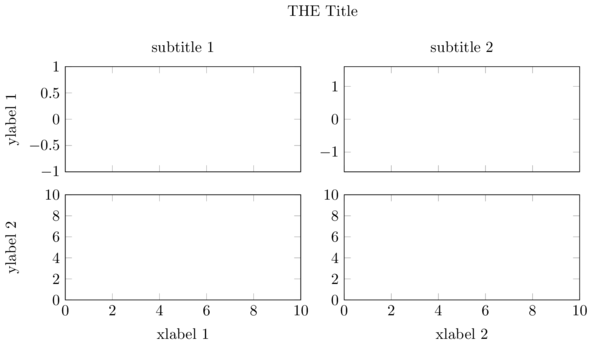

In [17]:
%%tikz -s 600,600

%/*
\pgfplotsset{
	scaled y ticks = false,
	width=7cm,
	height=4cm,
	axis on top,
	xtick={0,2,4,6,8,10},
	xticklabel style={text width=2em,align=center},
	xticklabels={\empty},
	xmin=0,xmax=10,
%	xmajorgrids,
%	xminorgrids,
%	ymajorgrids,
	xminorticks=true,
	yminorticks=true,
	ylabel shift={-1.5em},
	ylabel style={align=center}
}
%		
\begin{groupplot}[ 
    group style={
        group size=2 by 4,
        vertical sep=25pt
    },
]
% -------------------------------------------------------------------------------------------------------------------
% Plot [1, 1]
%-----------
\nextgroupplot[
		xticklabels={\empty},
		ymin=-1,
		ymax=1,
		ytick={-1,-0.5,...,1},
		%yticklabels={$-1$,0,1},
		ylabel={ylabel 1},
 		title={subtitle 1}
]
%-----------
% Plot [1, 2]
%-----------
\nextgroupplot[
 		xticklabels={\empty},
 		ymin=-0.00016,
 		ymax=0.00016,
 		ytick={-0.0001,0,0.0001},
 		yticklabels={$-1$,0,1},
		title={subtitle 2},
		ylabel={}
]
%-----------
% Plot [2, 1]
%-----------
\nextgroupplot[
		name=plot21,
		yshift=10pt,
		xticklabels={0, 2, 4, 6, 8,10},
		xlabel={xlabel 1},
		ymin=0,
		ymax=10000,
		ytick={0,2000,4000,6000,8000,10000},
		yticklabels={0,2,4,6,8,10},
		ylabel={ylabel 2}
]		
%-----------
% Plot [2, 2]
%-----------
\nextgroupplot[
		name=plot22,
		yshift=10pt,
		xticklabels={0, 2, 4, 6, 8,10},
		xlabel={xlabel 2},
		ymin=0,
		ymax=10000,
		ytick={0,2000,4000,6000,8000,10000},
		yticklabels={0,2,4,6,8,10}
]          
\end{groupplot}
\node (title) at ($(group c1r1.center)!0.5!(group c2r1.center)+(0,2.5cm)$) {THE Title};
%*/